In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pyreadstat

path = Path(os.getcwd())
base_dir = path.parent
data_in = os.path.join(str(base_dir),"datasets/")

#for future possibly find way to pull data into our dataset folder through a separate file
hotels_stata, metastata = pyreadstat.read_dta(os.path.join(data_in,"hotels-europe_price.dta"), encoding="latin1")
prices_stata, metastata = pyreadstat.read_dta(os.path.join(data_in,"hotels-europe_features.dta"), encoding="latin1")

#in future rearrange data so category values are at the end and also in transformer just replace a column for a column


In [3]:
metastata.variable_value_labels.keys()

dict_keys([])

In [4]:
hotels_stata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148021 entries, 0 to 148020
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hotel_id     148021 non-null  int64  
 1   price        148021 non-null  int64  
 2   scarce_room  148021 non-null  int64  
 3   offer        148021 non-null  int64  
 4   offer_cat    148021 non-null  object 
 5   year         148021 non-null  int64  
 6   month        148021 non-null  int64  
 7   weekend      148021 non-null  int64  
 8   holiday      148021 non-null  int64  
 9   nnights      148021 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 11.3+ MB


In [5]:
prices_stata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22902 entries, 0 to 22901
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            22902 non-null  int64  
 1   country             22902 non-null  object 
 2   city_actual         22902 non-null  object 
 3   rating_count        20722 non-null  object 
 4   distance            22902 non-null  float64
 5   center1label        22902 non-null  object 
 6   distance_alter      22902 non-null  float64
 7   center2label        22902 non-null  object 
 8   neighbourhood       22902 non-null  object 
 9   city                22902 non-null  object 
 10  stars               17187 non-null  float64
 11  ratingta            19909 non-null  float64
 12  ratingta_count      19909 non-null  object 
 13  accommodation_type  22902 non-null  object 
 14  rating              20722 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 2.6+

In [6]:
hotels_stata.hotel_id.nunique() #confirming merge by column

22902

In [7]:
prices_stata.hotel_id.nunique()

22902

In [8]:
#make function perhaps to confirm the merge by operation

In [9]:
hotels_europe = hotels_stata.merge(prices_stata,left_on='hotel_id', right_on='hotel_id')
hotels_europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148021 entries, 0 to 148020
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            148021 non-null  int64  
 1   price               148021 non-null  int64  
 2   scarce_room         148021 non-null  int64  
 3   offer               148021 non-null  int64  
 4   offer_cat           148021 non-null  object 
 5   year                148021 non-null  int64  
 6   month               148021 non-null  int64  
 7   weekend             148021 non-null  int64  
 8   holiday             148021 non-null  int64  
 9   nnights             148021 non-null  float64
 10  country             148021 non-null  object 
 11  city_actual         148021 non-null  object 
 12  rating_count        137498 non-null  object 
 13  distance            148021 non-null  float64
 14  center1label        148021 non-null  object 
 15  distance_alter      148021 non-nul

In [10]:
hotels_europe.head()

,hotel_id,price,scarce_room,offer,offer_cat,year,month,weekend,holiday,nnights,...,center1label,distance_alter,center2label,neighbourhood,city,stars,ratingta,ratingta_count,accommodation_type,rating
0,1,114,0,1,15-50% offer,2017,11,0,0,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
1,1,172,0,0,0% no offer,2017,11,1,0,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
2,1,122,0,1,15-50% offer,2017,12,0,1,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
3,1,552,0,1,1-15% offer,2017,12,0,1,4.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
4,1,122,0,1,15-50% offer,2018,1,1,0,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3


In [11]:
# just dropping these rows now but in future will attempt imputation
# come back and try to use KNN to impute a value for these columns
# check if the rows were dropping share any particular characteristics
# hotels_europe_no_na = hotels_europe.dropna(subset=['rating_count','stars', 'ratingta', 'ratingta_count', 'rating'])
# hotels_europe_no_na.info()

In [12]:
hotels_europe.head()

,hotel_id,price,scarce_room,offer,offer_cat,year,month,weekend,holiday,nnights,...,center1label,distance_alter,center2label,neighbourhood,city,stars,ratingta,ratingta_count,accommodation_type,rating
0,1,114,0,1,15-50% offer,2017,11,0,0,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
1,1,172,0,0,0% no offer,2017,11,1,0,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
2,1,122,0,1,15-50% offer,2017,12,0,1,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
3,1,552,0,1,1-15% offer,2017,12,0,1,4.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3
4,1,122,0,1,15-50% offer,2018,1,1,0,1.0,...,City centre,3.6,Montelbaanstoren,Amsterdam,Amsterdam,4.0,4.0,1115,Hotel,4.3


array([[<AxesSubplot:title={'center':'hotel_id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'scarce_room'}>,
        <AxesSubplot:title={'center':'offer'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'weekend'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'nnights'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'distance_alter'}>,
        <AxesSubplot:title={'center':'stars'}>],
       [<AxesSubplot:title={'center':'ratingta'}>,
        <AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

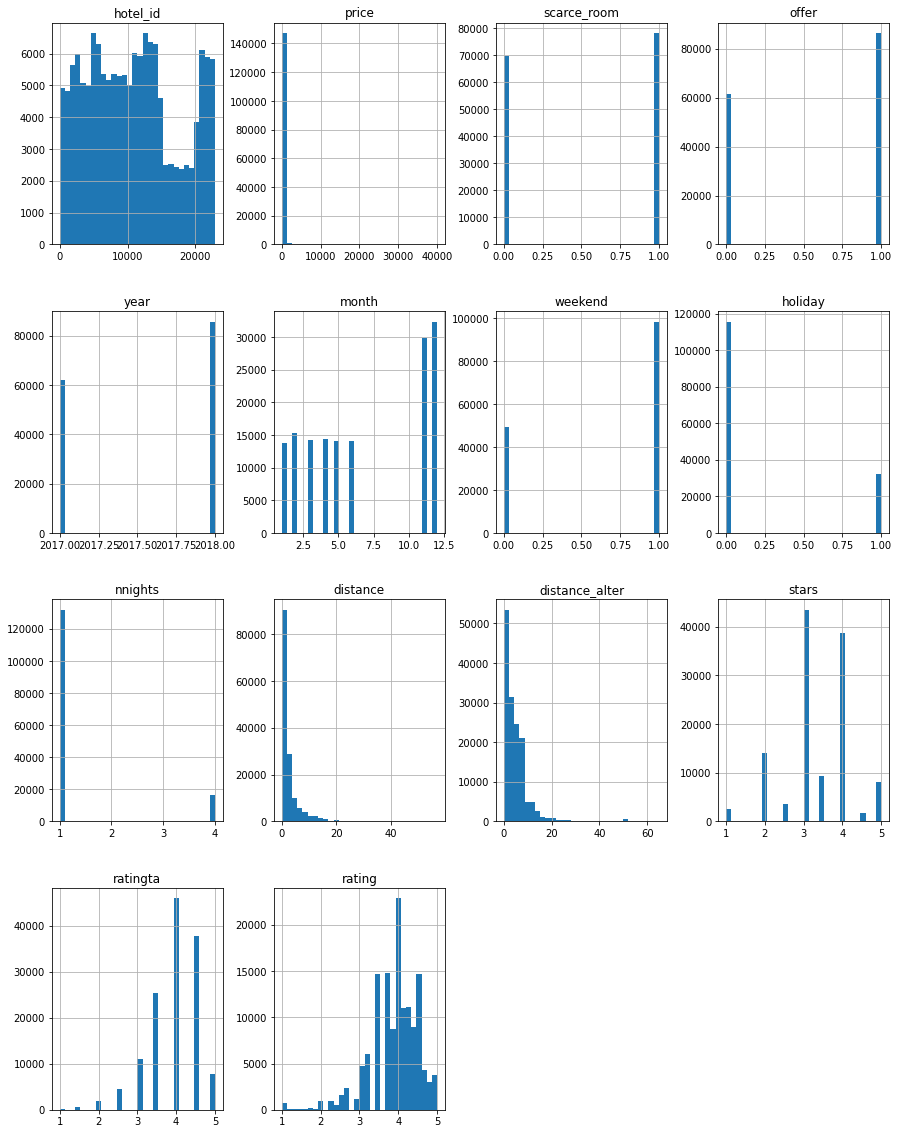

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

hotels_europe.hist(bins=30,figsize=(15,20))
# a lot of the values are skewed in future could take log transformations of some of them but 
# specifically the price which we are trying to predict

In [14]:
hotels_europe.country.value_counts()

Italy             26704
France            22511
United Kingdom    12178
Turkey            11945
Spain             11235
Germany            9087
Russia             8995
Poland             5759
Austria            5333
Portugal           4599
Czech Republic     3860
Greece             3115
Netherlands        2806
Hungary            2683
Belgium            2535
Sweden             2076
Ireland            1529
Croatia            1380
Latvia             1144
Romania            1118
Serbia              972
Ukraine             930
Denmark             903
Slovakia            847
Bulgaria            840
Finland             813
Estonia             746
Lithuania           725
Belarus             389
Malta               253
Cameroon             10
Egypt                 1
Name: country, dtype: int64

In [15]:
#only really want data for a specific country
# try dropping values only after having specififed the country
hotels_europe_france = hotels_europe.loc[hotels_europe.country=='France',:]

In [16]:
hotels_europe_france.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22511 entries, 61382 to 106306
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            22511 non-null  int64  
 1   price               22511 non-null  int64  
 2   scarce_room         22511 non-null  int64  
 3   offer               22511 non-null  int64  
 4   offer_cat           22511 non-null  object 
 5   year                22511 non-null  int64  
 6   month               22511 non-null  int64  
 7   weekend             22511 non-null  int64  
 8   holiday             22511 non-null  int64  
 9   nnights             22511 non-null  float64
 10  country             22511 non-null  object 
 11  city_actual         22511 non-null  object 
 12  rating_count        22192 non-null  object 
 13  distance            22511 non-null  float64
 14  center1label        22511 non-null  object 
 15  distance_alter      22511 non-null  float64
 16 

In [17]:
#going to split data now to prevent risk of data-snooping bias
#there are many different values in distance so we'll create bins for it
hotels_europe_france.distance.value_counts()

0.7    946
1.0    893
1.6    850
1.1    812
1.7    811
      ... 
9.5     18
8.6     11
7.0      8
8.8      7
9.9      5
Name: distance, Length: 111, dtype: int64

In [18]:
hotels_europe_france.distance.value_counts().sort_index() 

0.0      37
0.1     184
0.2     220
0.3     264
0.4     300
       ... 
16.0     38
17.0     19
18.0     58
20.0     24
22.0     33
Name: distance, Length: 111, dtype: int64

In [19]:
hotels_europe_france.distance.value_counts(bins=5).sort_index()

(-0.023, 4.4]    18141
(4.4, 8.8]        2614
(8.8, 13.2]       1313
(13.2, 17.6]       328
(17.6, 22.0]       115
Name: distance, dtype: int64

In [20]:
#use this method to categorize the data and split accordingly
#must see if it it's better to define the bins or just use defaults
hotels_europe_france.loc[:,'distance_cat'] = pd.cut(hotels_europe_france.distance, bins=[-np.inf,4,8,13,17.,np.inf], labels=[1,2,3,4,5]) # np.inf and -np.inf is important here and 0.0
hotels_europe_france['distance_cat'].value_counts()

/mnt/c/Users/Ron/git-repos/ML_repo/my_ml_env/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


1    17795
2     2741
3     1532
4      328
5      115
Name: distance_cat, dtype: int64

In [21]:
hotels_europe_france['distance_cat'].value_counts(dropna=False,normalize=True)

1    0.790502
2    0.121763
3    0.068056
4    0.014571
5    0.005109
Name: distance_cat, dtype: float64

Splitting data

In [22]:
hotels_europe_france.reset_index(drop=True,inplace=True)
hotels_europe_france.shape

(22511, 25)

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.20, train_size=0.80,random_state=42)

for train_index, test_index in split.split(hotels_europe_france,hotels_europe_france['distance_cat']):
        train_set = hotels_europe_france.loc[train_index,:]
        test_set = hotels_europe_france.loc[test_index,:]

In [24]:
train_set.shape

(18008, 25)

In [25]:
test_set.shape

(4503, 25)

In [26]:
train_set.distance_cat.value_counts(dropna=False,normalize=True)

1    0.790482
2    0.121779
3    0.068081
4    0.014549
5    0.005109
Name: distance_cat, dtype: float64

In [27]:
test_set.distance_cat.value_counts(dropna=False,normalize=True)

1    0.790584
2    0.121697
3    0.067955
4    0.014657
5    0.005108
Name: distance_cat, dtype: float64

can start exploring more now

In [28]:
for a in [train_set,test_set]:
    a.drop(columns = ['distance_cat'],inplace=True)
    a.reset_index(drop=True,inplace=True)

train_set.head()

,hotel_id,price,scarce_room,offer,offer_cat,year,month,weekend,holiday,nnights,...,center1label,distance_alter,center2label,neighbourhood,city,stars,ratingta,ratingta_count,accommodation_type,rating
0,12757,105,0,1,15-50% offer,2018,6,1,0,1.0,...,City centre,5.6,Billancourt Station,Clichy,Paris,3.0,4.5,61,Hotel,3.9
1,12746,68,0,1,15-50% offer,2017,12,0,1,1.0,...,City centre,3.4,Billancourt Station,Clamart,Paris,3.0,3.0,144,Hotel,3.4
2,12751,114,0,1,15-50% offer,2018,5,1,0,1.0,...,City centre,5.8,Billancourt Station,Clichy,Paris,3.0,4.5,73,Hotel,4.1
3,12285,161,0,1,15-50% offer,2018,5,1,0,1.0,...,City centre,4.2,Billancourt Station,Arc de Triomphe - Palais des Congres (17 arr.),Paris,4.0,4.0,305,Hotel,3.7
4,12715,315,1,1,15-50% offer,2018,1,1,0,1.0,...,City centre,4.0,Billancourt Station,Champs Elysees (8 arr.),Paris,5.0,4.5,523,Hotel,4.4


In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18008 entries, 0 to 18007
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            18008 non-null  int64  
 1   price               18008 non-null  int64  
 2   scarce_room         18008 non-null  int64  
 3   offer               18008 non-null  int64  
 4   offer_cat           18008 non-null  object 
 5   year                18008 non-null  int64  
 6   month               18008 non-null  int64  
 7   weekend             18008 non-null  int64  
 8   holiday             18008 non-null  int64  
 9   nnights             18008 non-null  float64
 10  country             18008 non-null  object 
 11  city_actual         18008 non-null  object 
 12  rating_count        17759 non-null  object 
 13  distance            18008 non-null  float64
 14  center1label        18008 non-null  object 
 15  distance_alter      18008 non-null  float64
 16  cent

In [30]:
hotels1 = train_set.copy()

In [31]:
hotels = hotels1.copy()

In [32]:
for i in ['ratingta_count','rating_count']: #converting to float to be used asa numerical column
    hotels.loc[:,i] = hotels.loc[:,i].astype(float)

In [33]:
hotels.info() # verifiying

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18008 entries, 0 to 18007
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            18008 non-null  int64  
 1   price               18008 non-null  int64  
 2   scarce_room         18008 non-null  int64  
 3   offer               18008 non-null  int64  
 4   offer_cat           18008 non-null  object 
 5   year                18008 non-null  int64  
 6   month               18008 non-null  int64  
 7   weekend             18008 non-null  int64  
 8   holiday             18008 non-null  int64  
 9   nnights             18008 non-null  float64
 10  country             18008 non-null  object 
 11  city_actual         18008 non-null  object 
 12  rating_count        17759 non-null  float64
 13  distance            18008 non-null  float64
 14  center1label        18008 non-null  object 
 15  distance_alter      18008 non-null  float64
 16  cent

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='weekend', ylabel='price'>,
        <AxesSubplot:xlabel='holiday', ylabel='price'>,
        <AxesSubplot:xlabel='distance', ylabel='price'>,
        <AxesSubplot:xlabel='stars', ylabel='price'>,
        <AxesSubplot:xlabel='rating', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='weekend'>,
        <AxesSubplot:xlabel='weekend', ylabel='weekend'>,
        <AxesSubplot:xlabel='holiday', ylabel='weekend'>,
        <AxesSubplot:xlabel='distance', ylabel='weekend'>,
        <AxesSubplot:xlabel='stars', ylabel='weekend'>,
        <AxesSubplot:xlabel='rating', ylabel='weekend'>],
       [<AxesSubplot:xlabel='price', ylabel='holiday'>,
        <AxesSubplot:xlabel='weekend', ylabel='holiday'>,
        <AxesSubplot:xlabel='holiday', ylabel='holiday'>,
        <AxesSubplot:xlabel='distance', ylabel='holiday'>,
        <AxesSubplot:xlabel='stars', ylabel='holiday'>,
        <AxesSubplot:xlabel='rating

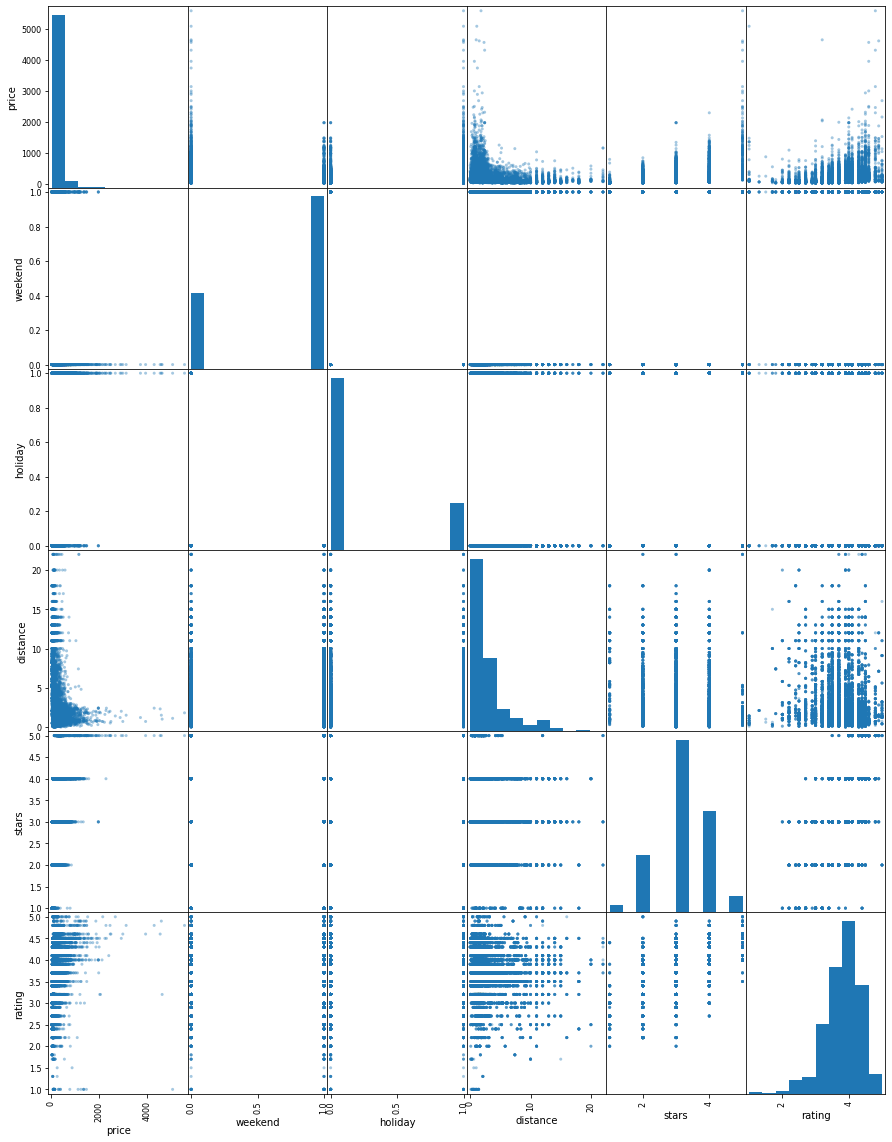

In [34]:
from pandas.plotting import scatter_matrix
# here we can see the correlation between different numeric values
scatter_matrix(hotels[['price','weekend','holiday','distance','stars','rating']], figsize=(15,20),alpha=.4)

* seems better to transform price

In [35]:
hotels.corr()['price'].sort_values(ascending=False) # seeing which variables affect price in a linear way

price             1.000000
nnights           0.581081
stars             0.365460
holiday           0.355609
ratingta          0.287347
month             0.264590
rating            0.246239
ratingta_count    0.159301
hotel_id          0.126350
scarce_room       0.093002
rating_count     -0.000180
offer            -0.034781
distance_alter   -0.110144
distance         -0.178361
year             -0.244277
weekend          -0.300208
Name: price, dtype: float64

In [36]:
# exploring the values of nnights and their effect on price
hotels[['nnights','price']].sort_values('price') 

,nnights,price
7525,1.0,22
2099,1.0,23
15515,1.0,28
6119,1.0,28
9878,1.0,30
...,...,...
7104,4.0,4555
12300,4.0,4604
11448,4.0,4638
9079,4.0,5075


In [37]:
hotels[['nnights','price']].sort_values(['nnights','price'],ascending=False)

,nnights,price
5814,4.0,5572
9079,4.0,5075
11448,4.0,4638
12300,4.0,4604
7104,4.0,4555
...,...,...
13300,1.0,30
6119,1.0,28
15515,1.0,28
2099,1.0,23


In [38]:
hotels.price.value_counts(bins=4).sort_index(ascending=True) #the price distribution before accounting for nnights

(16.448999999999998, 1409.5]    17931
(1409.5, 2797.0]                   65
(2797.0, 4184.5]                    6
(4184.5, 5572.0]                    6
Name: price, dtype: int64

In [39]:
(hotels.price / hotels.nnights).value_counts(bins=4).sort_index(ascending=True) #the price distribution after accounting for nnights

(20.048, 509.75]     17797
(509.75, 997.5]        145
(997.5, 1485.25]        62
(1485.25, 1973.0]        4
dtype: int64

In [40]:
hotels.loc[:,'price_one_night'] = hotels.price / hotels.nnights


* seeing if transforming price by nnight variable makes a difference and it does a lot at least for \
the most important variables

In [41]:
# seeing how the variables change when taking nnights into account as opposed to not taking it into account respectively in the dataframe
df1 = pd.DataFrame(hotels.corr()['price_one_night'])
df1 = pd.concat([df1,hotels.corr()['price']], axis=1)
df1.sort_values('price_one_night') 

,price_one_night,price
distance,-0.252262,-0.178361
distance_alter,-0.155488,-0.110144
offer,-0.090851,-0.034781
holiday,-0.061676,0.355609
nnights,-0.020876,0.581081
month,0.004141,0.264590
rating_count,0.009229,-0.000180
weekend,0.011054,-0.300208
year,0.020662,-0.244277
scarce_room,0.068559,0.093002


array([[<AxesSubplot:xlabel='price_one_night', ylabel='price_one_night'>,
        <AxesSubplot:xlabel='distance', ylabel='price_one_night'>,
        <AxesSubplot:xlabel='stars', ylabel='price_one_night'>,
        <AxesSubplot:xlabel='ratingta', ylabel='price_one_night'>],
       [<AxesSubplot:xlabel='price_one_night', ylabel='distance'>,
        <AxesSubplot:xlabel='distance', ylabel='distance'>,
        <AxesSubplot:xlabel='stars', ylabel='distance'>,
        <AxesSubplot:xlabel='ratingta', ylabel='distance'>],
       [<AxesSubplot:xlabel='price_one_night', ylabel='stars'>,
        <AxesSubplot:xlabel='distance', ylabel='stars'>,
        <AxesSubplot:xlabel='stars', ylabel='stars'>,
        <AxesSubplot:xlabel='ratingta', ylabel='stars'>],
       [<AxesSubplot:xlabel='price_one_night', ylabel='ratingta'>,
        <AxesSubplot:xlabel='distance', ylabel='ratingta'>,
        <AxesSubplot:xlabel='stars', ylabel='ratingta'>,
        <AxesSubplot:xlabel='ratingta', ylabel='ratingta'>]], dty

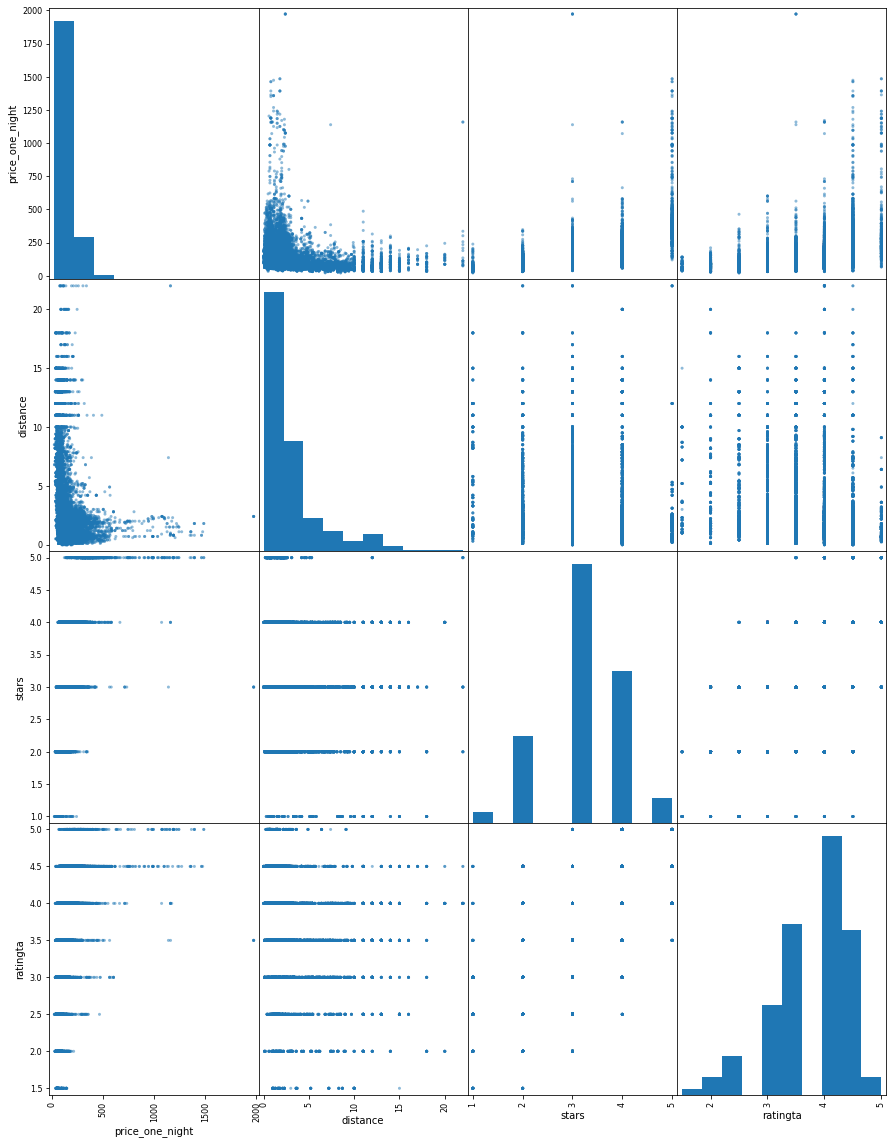

In [42]:
scatter_matrix(hotels[['price_one_night','distance','stars','ratingta']], figsize=(15,20))

* checking out some cat. variables \
in the future stars could be considered a categorical variable


In [43]:
hotels.select_dtypes(include='object')


,offer_cat,country,city_actual,center1label,center2label,neighbourhood,city,accommodation_type
0,15-50% offer,France,Clichy,City centre,Billancourt Station,Clichy,Paris,Hotel
1,15-50% offer,France,Clamart,City centre,Billancourt Station,Clamart,Paris,Hotel
2,15-50% offer,France,Clichy,City centre,Billancourt Station,Clichy,Paris,Hotel
3,15-50% offer,France,Paris,City centre,Billancourt Station,Arc de Triomphe - Palais des Congres (17 arr.),Paris,Hotel
4,15-50% offer,France,Paris,City centre,Billancourt Station,Champs Elysees (8 arr.),Paris,Hotel
...,...,...,...,...,...,...,...,...
18003,1-15% offer,France,Paris,City centre,Billancourt Station,Bercy,Paris,Hotel
18004,0% no offer,France,Paris,City centre,Billancourt Station,Pere Lachaise,Paris,Vacation home Condo
18005,15-50% offer,France,Paris,City centre,Billancourt Station,Champs Elysees (8 arr.),Paris,Hotel
18006,0% no offer,France,Paris,City centre,Billancourt Station,Montmartre - Sacre Coeur (18 arr.),Paris,Hotel


In [44]:
hotels.accommodation_type.value_counts()

Hotel                  15843
Vacation home Condo      887
Apartment                571
Apart-hotel              349
Hostel                   139
Guest House               73
Bed and breakfast         64
Palace                    54
Caravan Park              18
Cabin / Lodge              8
House boat                 2
Name: accommodation_type, dtype: int64

In [45]:
hotels.offer_cat.value_counts()

15-50% offer     6909
0% no offer      5916
1-15% offer      3632
50%-75% offer    1441
75%+ offer        110
Name: offer_cat, dtype: int64

In [46]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
acc_cat = cat_encoder.fit_transform(hotels[['accommodation_type','offer_cat']])

In [47]:
print(acc_cat.toarray())
print(acc_cat.toarray().shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(18008, 16)


In [48]:
cat_encoder.categories_

[array(['Apart-hotel', 'Apartment', 'Bed and breakfast', 'Cabin / Lodge',
        'Caravan Park', 'Guest House', 'Hostel', 'Hotel', 'House boat',
        'Palace', 'Vacation home Condo'], dtype=object),
 array(['0% no offer', '1-15% offer', '15-50% offer', '50%-75% offer',
        '75%+ offer'], dtype=object)]

In [49]:
hotels.corr()['ratingta'].sort_values()

distance          -0.204826
distance_alter    -0.187498
holiday           -0.013970
nnights           -0.007629
year              -0.006278
month              0.004376
weekend            0.011416
scarce_room        0.038094
offer              0.059290
hotel_id           0.066969
rating_count       0.093760
ratingta_count     0.282428
price              0.287347
price_one_night    0.420845
stars              0.527386
rating             0.845261
ratingta           1.000000
Name: ratingta, dtype: float64

In [50]:
hotels.corr()['stars'].sort_values()

distance          -0.147646
distance_alter    -0.139701
scarce_room       -0.132384
offer             -0.026709
holiday           -0.011757
year              -0.005146
nnights           -0.004647
weekend            0.003565
month              0.005087
hotel_id           0.076233
rating_count       0.135021
ratingta_count     0.319354
price              0.365460
ratingta           0.527386
price_one_night    0.529802
rating             0.591449
stars              1.000000
Name: stars, dtype: float64

In [51]:
impute_col = ['stars','ratingta','rating','price_one_night']
index_sample = hotels.loc[(hotels['ratingta'].isna()) & (hotels['stars'].isna()), impute_col].head(10).index
hotels.loc[(hotels['ratingta'].isna()) & (hotels['stars'].isna()), impute_col].head(10) 
#some sample values for reference before doing the transformation

,stars,ratingta,rating,price_one_night
22,NaN,NaN,NaN,226.0
50,NaN,NaN,NaN,116.0
67,NaN,NaN,3.2,720.0
160,NaN,NaN,NaN,405.0
207,NaN,NaN,NaN,168.0
240,NaN,NaN,5.0,253.0
246,NaN,NaN,3.0,105.0
266,NaN,NaN,5.0,127.0
269,NaN,NaN,NaN,220.0
271,NaN,NaN,2.0,78.0


In [52]:
hotels.loc[:,impute_col].agg(['mean','median'])
#some aggregations for reference before doing the transformation

,stars,ratingta,rating,price_one_night
mean,3.172336,3.762663,3.814871,149.38097
median,3.000000,4.000000,3.900000,123.00000


In [53]:
hotels_to_impute = hotels.loc[:,impute_col].copy() #separating the data that I want to use to impute the values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7) #using the KNN imputer with seven neighbors

In [54]:
hotels_to_impute_new_values = imputer.fit_transform(hotels_to_impute)

In [55]:
hotels_tr = pd.DataFrame(hotels_to_impute_new_values, columns = hotels_to_impute.columns, index=hotels_to_impute.index)
hotels_tr.iloc[index_sample,:] #reference after the transformation to see how the values changed

,stars,ratingta,rating,price_one_night
22,3.428571,4.285714,4.171429,226.0
50,2.714286,3.642857,3.871429,116.0
67,3.857143,4.214286,3.200000,720.0
160,4.714286,4.214286,4.171429,405.0
207,3.000000,4.142857,3.985714,168.0
240,4.285714,4.428571,5.000000,253.0
246,2.857143,2.714286,3.000000,105.0
266,3.714286,4.428571,5.000000,127.0
269,3.428571,4.285714,4.171429,220.0
271,2.428571,2.285714,2.000000,78.0


In [56]:
hotels_tr.loc[:,impute_col].agg(['mean','median']) #reference after the transformation to see how the values changed

,stars,ratingta,rating,price_one_night
mean,3.129903,3.763399,3.815847,149.38097
median,3.000000,4.000000,3.900000,123.00000


transformer time

In [57]:
from sklearn.base import BaseEstimator,TransformerMixin



In [58]:
num_col = ['ratingta_count','rating_count','nnights','price']

ratingta_count_ix, rating_count_ix, nnights_ix, price_ix = [hotels.columns.get_loc(x) for x in num_col]


In [59]:
print(hotels.values[:,price_ix].sum()) # reference to make sure values are changed
print((hotels.values[:,price_ix] / hotels.values[:,nnights_ix]).sum())

3495590
2690052.5


In [60]:
class hotels_attribute_adder(BaseEstimator,TransformerMixin):

    def __init__(self,change_rating_count_float=False):
        self.change_rating_count_float = change_rating_count_float

    def fit(self,X,y=None):
        return self #nothing to fit since we are just creating new and editing new columns
    def transform(self,X):

        ratingta_count_float = X[:, ratingta_count_ix].astype(float)
        rating_count_float = X[:, rating_count_ix].astype(float)
        price_one_night = X[:,price_ix] / X[:,nnights_ix]

        if self.change_rating_count_float :
                array = np.c_[rating_count_float, ratingta_count_float, price_one_night, X  ]
                
                return array
        else:
                return np.c_[X, price_one_night]

In [61]:
attr_adder = hotels_attribute_adder(change_rating_count_float=True)
attr_adder

hotels_attribute_adder(change_rating_count_float=True)

In [62]:

hotels_test = attr_adder.transform(hotels1.values)


In [63]:
hotels_test.shape

(18008, 27)

In [64]:
hotels_extra_attr = pd.DataFrame(hotels_test, columns = ['rating_count_float'] + ['ratingta_count_float'] +\
         ['price_one_night'] + hotels1.columns.tolist(), index=hotels1.index)
hotels_extra_attr.head()

,rating_count_float,ratingta_count_float,price_one_night,hotel_id,price,scarce_room,offer,offer_cat,year,month,...,center1label,distance_alter,center2label,neighbourhood,city,stars,ratingta,ratingta_count,accommodation_type,rating
0,32.0,61.0,105.0,12757,105,0,1,15-50% offer,2018,6,...,City centre,5.6,Billancourt Station,Clichy,Paris,3.0,4.5,61,Hotel,3.9
1,56.0,144.0,68.0,12746,68,0,1,15-50% offer,2017,12,...,City centre,3.4,Billancourt Station,Clamart,Paris,3.0,3.0,144,Hotel,3.4
2,92.0,73.0,114.0,12751,114,0,1,15-50% offer,2018,5,...,City centre,5.8,Billancourt Station,Clichy,Paris,3.0,4.5,73,Hotel,4.1
3,79.0,305.0,161.0,12285,161,0,1,15-50% offer,2018,5,...,City centre,4.2,Billancourt Station,Arc de Triomphe - Palais des Congres (17 arr.),Paris,4.0,4.0,305,Hotel,3.7
4,102.0,523.0,315.0,12715,315,1,1,15-50% offer,2018,1,...,City centre,4.0,Billancourt Station,Champs Elysees (8 arr.),Paris,5.0,4.5,523,Hotel,4.4


In [65]:
hotels_extra_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18008 entries, 0 to 18007
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rating_count_float    17759 non-null  object
 1   ratingta_count_float  17551 non-null  object
 2   price_one_night       18008 non-null  object
 3   hotel_id              18008 non-null  object
 4   price                 18008 non-null  object
 5   scarce_room           18008 non-null  object
 6   offer                 18008 non-null  object
 7   offer_cat             18008 non-null  object
 8   year                  18008 non-null  object
 9   month                 18008 non-null  object
 10  weekend               18008 non-null  object
 11  holiday               18008 non-null  object
 12  nnights               18008 non-null  object
 13  country               18008 non-null  object
 14  city_actual           18008 non-null  object
 15  rating_count          17759 non-null

In [66]:
hotels_extra_attr.agg(['mean','median'])

,rating_count_float,ratingta_count_float,price_one_night,hotel_id,price,scarce_room,offer,year,month,weekend,holiday,nnights,rating_count,distance,distance_alter,stars,ratingta,ratingta_count,rating
mean,147.53128,425.317532,149.38097,12571.015993,194.113172,0.403154,0.671479,2017.613394,6.598068,0.695469,0.214294,1.314194,147.53128,3.053771,5.462006,3.172336,3.762663,425.317532,3.814871
median,104.00000,287.000000,123.00000,13055.000000,136.000000,0.000000,1.000000,2018.000000,5.000000,1.000000,0.000000,1.000000,104.00000,1.900000,5.100000,3.000000,4.000000,287.000000,3.900000


In [67]:
hotels.loc[:,impute_col].agg(['mean','median']) #clean transformation

,stars,ratingta,rating,price_one_night
mean,3.172336,3.762663,3.814871,149.38097
median,3.000000,4.000000,3.900000,123.00000


going to start on a pipeline

In [68]:
from sklearn.pipeline import Pipeline



In [69]:
#this pipeline forces me to use .values
num_pipeline = Pipeline([('attr_add', hotels_attribute_adder(change_rating_count_float=True)),\
                         ('imputer', KNNImputer(n_neighbors=7))])
num_pipeline2 = Pipeline(
                        [('imputer', KNNImputer(n_neighbors=7)),
                        ('attr_add', hotels_attribute_adder(change_rating_count_float=True)) 
                        ])
#this pipeline throws an array into our transformer

In [70]:
#our pipeline only works with numeric data so we have to test it on a DF with just numeric columns
pipeline_col = ['hotel_id',
 'price',
 'scarce_room',
 'offer',
 'year',
 'month',
 'weekend',
 'holiday',
 'nnights',
 'distance',
 'distance_alter',
 'stars',
 'ratingta',
 'rating','ratingta_count','rating_count']

hotels_num = hotels.loc[:,pipeline_col]
hotels_num.shape

(18008, 16)

In [71]:
num_col = ['ratingta_count','rating_count','nnights','price']
ratingta_count_ix, rating_count_ix, nnights_ix, price_ix = [hotels_num.columns.get_loc(x) for x in num_col] #getting the new column locations for the pipeline

In [72]:

hotel_num_transform = num_pipeline.fit_transform(hotels_num.values)

hotel_num_transform.shape


(18008, 19)

In [73]:
hotel_num_transform

array([[  32. ,   61. ,  105. , ...,    3.9,   61. ,   32. ],
       [  56. ,  144. ,   68. , ...,    3.4,  144. ,   56. ],
       [  92. ,   73. ,  114. , ...,    4.1,   73. ,   92. ],
       ...,
       [ 125. , 1080. ,  207. , ...,    4. , 1080. ,  125. ],
       [ 107. ,  131. ,   87. , ...,    3.5,  131. ,  107. ],
       [  68. ,  905. ,  260. , ...,    4.5,  905. ,   68. ]])

In [74]:
hotels_extra_attr2 = pd.DataFrame(hotel_num_transform, columns = ['rating_count_float'] + ['ratingta_count_float'] +\
         ['price_one_night'] + hotels_num.columns.tolist(), index=hotels_num.index)

In [75]:
hotels_extra_attr2

,rating_count_float,ratingta_count_float,price_one_night,hotel_id,price,scarce_room,offer,year,month,weekend,holiday,nnights,distance,distance_alter,stars,ratingta,rating,ratingta_count,rating_count
0,32.0,61.0,105.0,12757.0,105.0,0.0,1.0,2018.0,6.0,1.0,0.0,1.0,3.0,5.6,3.0,4.5,3.9,61.0,32.0
1,56.0,144.0,68.0,12746.0,68.0,0.0,1.0,2017.0,12.0,0.0,1.0,1.0,7.1,3.4,3.0,3.0,3.4,144.0,56.0
2,92.0,73.0,114.0,12751.0,114.0,0.0,1.0,2018.0,5.0,1.0,0.0,1.0,3.3,5.8,3.0,4.5,4.1,73.0,92.0
3,79.0,305.0,161.0,12285.0,161.0,0.0,1.0,2018.0,5.0,1.0,0.0,1.0,2.6,4.2,4.0,4.0,3.7,305.0,79.0
4,102.0,523.0,315.0,12715.0,315.0,1.0,1.0,2018.0,1.0,1.0,0.0,1.0,1.6,4.0,5.0,4.5,4.4,523.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18003,109.0,230.0,92.0,12498.0,92.0,1.0,1.0,2018.0,1.0,1.0,0.0,1.0,1.6,6.1,3.0,3.5,3.4,230.0,109.0
18004,44.0,1839.0,145.0,14102.0,145.0,0.0,0.0,2018.0,5.0,1.0,0.0,1.0,2.7,7.7,3.0,4.0,4.3,1839.0,44.0
18005,125.0,1080.0,207.0,12635.0,207.0,0.0,1.0,2018.0,3.0,1.0,0.0,1.0,2.0,4.2,4.0,4.0,4.0,1080.0,125.0
18006,107.0,131.0,87.0,13621.0,87.0,0.0,0.0,2017.0,12.0,0.0,1.0,1.0,2.3,6.5,4.0,4.0,3.5,131.0,107.0


Making a better pipeline

In [76]:
num_col = ['ratingta_count','rating_count','nnights','price']



num_attribs = ['ratingta_count','rating_count','nnights','price','stars','ratingta','rating','distance']
cat_attribs  = ['accommodation_type','offer_cat']

ratingta_count_ix, rating_count_ix, nnights_ix, price_ix = [x for x,y in enumerate(num_attribs[:4])] # so my transformer in numpipeline2 will know the col locations

from sklearn.compose import ColumnTransformer


In [77]:

full_pipeline = ColumnTransformer([
                        ('num_val', num_pipeline2, num_attribs), #in the future separate KNNimputer so that I can use 'price_on_night' to imputes values as well
                        ('cat_val', OneHotEncoder(), cat_attribs)])

hotels1_prepared = full_pipeline.fit_transform(hotels1)

In [78]:
hotels1_prepared.shape

(18008, 27)

In [79]:
hotels1_prepared[1]

array([ 56. , 144. ,  68. , 144. ,  56. ,   1. ,  68. ,   3. ,   3. ,
         3.4,   7.1,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ])

In [80]:
y_labels = hotels1_prepared[:,6]
y_labels

array([105.,  68., 114., ..., 207.,  87., 260.])

In [81]:
np.delete(hotels1_prepared,list(range(7)), axis=1)[1] #getting rid of the first couple columns in num_attribs 

array([3. , 3. , 3.4, 7.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 0. , 0. , 0. , 1. , 0. , 0. ])

In [82]:
hotels1_prepared_cut = np.delete(hotels1_prepared,list(range(7)), axis=1)

In [83]:
hotels1_prepared_cut[1]

array([3. , 3. , 3.4, 7.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 0. , 0. , 0. , 1. , 0. , 0. ])

selecting a model

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(hotels1_prepared_cut,y_labels)

LinearRegression()

In [85]:
sample_data = hotels1.iloc[:5,:]
prepared_sample_data = full_pipeline.transform(sample_data)

In [86]:
sample_y_labels = prepared_sample_data[:,6]
sample_y_labels

array([105.,  68., 114., 161., 315.])

In [87]:
prepared_sample_data = np.delete(prepared_sample_data,list(range(7)), axis=1)

In [88]:
print('Predictions:', lin_reg.predict(prepared_sample_data), sep='\n')

Predictions:
[200.48746152 117.54585648 196.82318182 262.85862407 361.72055755]


In [89]:
print('actual values:', sample_y_labels, sep='\n')

actual values:
[105.  68. 114. 161. 315.]


In [90]:
lin_reg.coef_

array([ 7.81425187e+01,  4.01837143e+01, -8.47807904e+00, -6.56221296e+00,
       -1.86656266e+02, -7.94053670e+01, -2.09579519e+02, -9.42517218e+01,
       -2.11827913e+02, -1.80925886e+02, -2.57698548e+02, -1.77091089e+02,
        8.00204269e+02,  8.01731923e+02, -2.04499881e+02,  1.58905947e+01,
        2.31122160e+01, -3.44304960e+00, -3.48840557e+01, -6.75705424e-01])

In [91]:
hotel_predictions = lin_reg.predict(hotels1_prepared_cut)

In [92]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_labels,hotel_predictions,squared=False)
lin_rmse

192.0554286074114

In [93]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_labels, hotel_predictions)
lin_mae

100.76626580806372

In [94]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(hotels1_prepared_cut,y_labels)

DecisionTreeRegressor(random_state=42)

In [95]:
tree_hotel_predictions = tree_reg.predict(hotels1_prepared_cut)

In [96]:
tree_rmse = mean_squared_error(y_labels,tree_hotel_predictions, squared=False)
tree_rmse


136.9415626836758

Going to experiment with cross_validation now

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
tree_scores = cross_val_score(tree_reg, hotels1_prepared_cut, y_labels, cv=5, scoring='neg_mean_squared_error')
tree_scores_rmse = np.sqrt(-tree_scores)
def show_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('std:',scores.std())

In [99]:
show_scores(tree_scores_rmse)

scores: [213.75759117 210.68301167 215.31788069 202.82270558 179.053353  ]
mean: 204.32690842256073
std: 13.350314804165365


In [100]:
lin_reg_scores = cross_val_score(lin_reg,hotels1_prepared_cut,y_labels,cv=5,scoring='neg_mean_squared_error')
lin_reg_scores_rmse = np.sqrt(-lin_reg_scores)
show_scores(lin_reg_scores_rmse) # less overfitting on the data

scores: [187.89929787 212.6756002  181.72346753 200.02086906 180.0740123 ]
mean: 192.47864939244874
std: 12.29082030109544


In [101]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(hotels1_prepared_cut,y_labels)

RandomForestRegressor(random_state=42)

In [102]:
forest_hotel_predictions = forest_reg.predict(hotels1_prepared_cut)
forest_rmse = mean_squared_error(y_labels,forest_hotel_predictions,squared=False)
forest_rmse

140.80225885706298

In [103]:
forest_scores = cross_val_score(forest_reg,hotels1_prepared_cut,y_labels,cv=5,scoring='neg_mean_squared_error')
forest_scores_rmse = np.sqrt(-forest_scores)
show_scores(forest_scores_rmse)

scores: [196.49541871 202.73735992 178.22091256 194.44787139 170.71403016]
mean: 188.52311854568674
std: 12.033320417608858


In [104]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(hotels1_prepared_cut,y_labels)

SVR(kernel='linear')

In [105]:
svm_predictions = svm_reg.predict(hotels1_prepared_cut)
svm_rmse = mean_squared_error(y_labels,svm_predictions,squared=False)
svm_rmse

209.77812586690104

Fine-tuning the model

In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[10,25,50], 'random_state':[42], 'max_features':[2,4,6,8]}, \
                {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

In [107]:
forest_reg = RandomForestRegressor(random_state=42)
clf = GridSearchCV(forest_reg, param_grid, return_train_score=True, scoring='neg_mean_squared_error', cv=5 )
clf.fit(hotels1_prepared_cut,y_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 25, 50], 'random_state': [42]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
clf.best_params_

{'max_features': 2, 'n_estimators': 50, 'random_state': 42}

In [109]:
clf.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=50, random_state=42)

In [110]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_random_state', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [111]:
cv_scores = clf.cv_results_
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
        print(np.sqrt(-mean_score), params)

190.32328368650516 {'max_features': 2, 'n_estimators': 10, 'random_state': 42}
187.1786931004308 {'max_features': 2, 'n_estimators': 25, 'random_state': 42}
186.5049611389159 {'max_features': 2, 'n_estimators': 50, 'random_state': 42}
189.59578182238977 {'max_features': 4, 'n_estimators': 10, 'random_state': 42}
186.91612875991524 {'max_features': 4, 'n_estimators': 25, 'random_state': 42}
187.03393309696816 {'max_features': 4, 'n_estimators': 50, 'random_state': 42}
190.21608869429068 {'max_features': 6, 'n_estimators': 10, 'random_state': 42}
187.64148380335334 {'max_features': 6, 'n_estimators': 25, 'random_state': 42}
186.92270678510286 {'max_features': 6, 'n_estimators': 50, 'random_state': 42}
191.3456695814883 {'max_features': 8, 'n_estimators': 10, 'random_state': 42}
188.01740200650957 {'max_features': 8, 'n_estimators': 25, 'random_state': 42}
187.0235975307704 {'max_features': 8, 'n_estimators': 50, 'random_state': 42}
195.70114837339108 {'bootstrap': False, 'max_features': 

In [112]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_random_state,param_bootstrap,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.131402,0.033318,0.012324,0.002365,2,10,42,NaN,"{'max_features': 2, 'n_estimators': 10, 'rando...",-39248.114891,...,-36222.952313,4168.112179,11,-18784.572752,-18253.619026,-20654.780016,-18871.246431,-20708.576097,-19454.558864,1024.156366
1,0.250567,0.027808,0.026682,0.004296,2,25,42,NaN,"{'max_features': 2, 'n_estimators': 25, 'rando...",-37433.141310,...,-35035.863151,4087.874240,6,-18403.753376,-17881.339148,-20264.648105,-18671.879525,-20032.457717,-19050.815574,934.555278
2,0.449955,0.029625,0.039828,0.000648,2,50,42,NaN,"{'max_features': 2, 'n_estimators': 50, 'rando...",-37001.067381,...,-34784.100529,4205.356042,1,-18236.643464,-17711.678903,-20066.429774,-18544.130814,-20006.912267,-18913.159044,955.378373
3,0.093188,0.000552,0.008486,0.000079,4,10,42,NaN,"{'max_features': 4, 'n_estimators': 10, 'rando...",-39096.678442,...,-35946.560485,4404.570830,9,-18824.941341,-18259.559843,-20633.084803,-18956.386100,-20755.819273,-19485.958272,1014.878260
4,0.229523,0.002727,0.020782,0.000885,4,25,42,NaN,"{'max_features': 4, 'n_estimators': 25, 'rando...",-37224.428069,...,-34937.639191,4188.831442,2,-18416.280724,-17849.114663,-20214.700368,-18671.945035,-20046.506971,-19039.709552,931.200826
5,0.474103,0.013216,0.042916,0.005857,4,50,42,NaN,"{'max_features': 4, 'n_estimators': 50, 'rando...",-37072.541109,...,-34981.692130,4078.407753,5,-18272.835213,-17724.727752,-20085.464484,-18551.475805,-19989.866398,-18924.873930,947.218126
6,0.107325,0.001011,0.008883,0.000433,6,10,42,NaN,"{'max_features': 6, 'n_estimators': 10, 'rando...",-38904.852953,...,-36182.160398,4038.845327,10,-18802.432480,-18409.336713,-20575.644972,-18954.662470,-20806.225618,-19509.660451,983.494862
7,0.264008,0.003955,0.020137,0.000760,6,25,42,NaN,"{'max_features': 6, 'n_estimators': 25, 'rando...",-37454.696815,...,-35209.326444,3849.699965,7,-18381.772624,-17930.619157,-20224.526429,-18692.939210,-20105.154447,-19067.002373,929.349401
8,0.561625,0.030098,0.042924,0.004183,6,50,42,NaN,"{'max_features': 6, 'n_estimators': 50, 'rando...",-37248.283482,...,-34940.098312,4048.103289,3,-18278.565133,-17734.344366,-20094.665861,-18571.968836,-20050.798076,-18946.068455,958.487352
9,0.122231,0.001364,0.008453,0.000225,8,10,42,NaN,"{'max_features': 8, 'n_estimators': 10, 'rando...",-38682.132838,...,-36613.165268,4340.989328,14,-18665.511731,-18367.455341,-20590.526817,-18897.402119,-20795.078638,-19463.194929,1019.985944


In [113]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribution = {'n_estimators':randint(low=1,high=100), 'max_features':randint(low=1,high=8)}
forest_reg = RandomForestRegressor(random_state=42)

In [114]:
random_search_cv = RandomizedSearchCV(forest_reg, param_distribution, scoring='neg_mean_squared_error', return_train_score=True, cv=5 )
random_search_cv.fit(hotels1_prepared_cut,y_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4574a97d90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4574a97100>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [115]:
random_search_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [116]:
cv_scores = random_search_cv.cv_results_
for mean_score , params in zip(cv_scores['mean_test_score'], cv_scores['params']):
        print(np.sqrt(-mean_score), params)

186.51288709966624 {'max_features': 6, 'n_estimators': 69}
186.9844348366575 {'max_features': 2, 'n_estimators': 31}
186.7615470405868 {'max_features': 6, 'n_estimators': 86}
186.57073707744436 {'max_features': 7, 'n_estimators': 53}
187.1016079387465 {'max_features': 2, 'n_estimators': 29}
187.18069356221503 {'max_features': 2, 'n_estimators': 21}
213.77114067932004 {'max_features': 3, 'n_estimators': 1}
186.96464475728152 {'max_features': 4, 'n_estimators': 66}
187.26285376849654 {'max_features': 2, 'n_estimators': 27}
189.08686907020893 {'max_features': 4, 'n_estimators': 11}


In [117]:
random_search_cv.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=69, random_state=42)

now going to analyze the best models and see where they can improve

In [118]:
random_search_cv.best_estimator_.feature_importances_

array([2.94046660e-01, 1.09723101e-01, 1.90988514e-01, 2.31147606e-01,
       2.97087642e-03, 2.12446701e-02, 3.10626320e-04, 2.18243584e-04,
       4.95457962e-05, 1.02399136e-03, 1.16250727e-03, 1.80920278e-02,
       1.15322504e-03, 6.31808046e-02, 6.02439249e-03, 2.25233847e-02,
       1.43480623e-02, 1.45363594e-02, 6.27010834e-03, 9.85293182e-04])

In [119]:
full_pipeline.named_transformers_

{'num_val': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=7)),
                 ('attr_add',
                  hotels_attribute_adder(change_rating_count_float=True))]),
 'cat_val': OneHotEncoder(),
 'remainder': 'drop'}

In [120]:
# full_pipeline.named_transformers_['num_val'].categories_ not possible
accomodation_cat = full_pipeline.named_transformers_['cat_val'].categories_[0].tolist()
offer_cat = full_pipeline.named_transformers_['cat_val'].categories_[1].tolist()
manual_columns = ['stars','ratingta','rating','distance']

In [121]:
features = random_search_cv.best_estimator_.feature_importances_
labels = manual_columns + accomodation_cat + offer_cat
len(features)== len(labels)

True

In [122]:
for feature, label in zip(features,labels):
        print(feature,label)

0.29404666034959775 stars
0.10972310068194267 ratingta
0.19098851407554993 rating
0.2311476063230376 distance
0.002970876424671745 Apart-hotel
0.021244670067241223 Apartment
0.0003106263204640219 Bed and breakfast
0.0002182435839650007 Cabin / Lodge
4.954579618716977e-05 Caravan Park
0.0010239913578064007 Guest House
0.0011625072668029826 Hostel
0.01809202777518778 Hotel
0.0011532250445122204 House boat
0.06318080456029544 Palace
0.006024392490059224 Vacation home Condo
0.022523384664902543 0% no offer
0.014348062288224005 1-15% offer
0.01453635940878571 15-50% offer
0.006270108338342588 50%-75% offer
0.0009852931824239938 75%+ offer


In [123]:
sorted(zip(features,labels),reverse=True) #find a way to easily drop the worst categories

[(0.29404666034959775, 'stars'),
 (0.2311476063230376, 'distance'),
 (0.19098851407554993, 'rating'),
 (0.10972310068194267, 'ratingta'),
 (0.06318080456029544, 'Palace'),
 (0.022523384664902543, '0% no offer'),
 (0.021244670067241223, 'Apartment'),
 (0.01809202777518778, 'Hotel'),
 (0.01453635940878571, '15-50% offer'),
 (0.014348062288224005, '1-15% offer'),
 (0.006270108338342588, '50%-75% offer'),
 (0.006024392490059224, 'Vacation home Condo'),
 (0.002970876424671745, 'Apart-hotel'),
 (0.0011625072668029826, 'Hostel'),
 (0.0011532250445122204, 'House boat'),
 (0.0010239913578064007, 'Guest House'),
 (0.0009852931824239938, '75%+ offer'),
 (0.0003106263204640219, 'Bed and breakfast'),
 (0.0002182435839650007, 'Cabin / Lodge'),
 (4.954579618716977e-05, 'Caravan Park')]

going to evaluate on test set now

In [124]:
forest_reg_final = clf.best_estimator_
forest_reg_final

RandomForestRegressor(max_features=2, n_estimators=50, random_state=42)

In [125]:
hotels_test_prepared = full_pipeline.transform(test_set)

In [126]:
y_test_labels = hotels_test_prepared[:,6]
y_test_labels

array([128., 141., 156., ...,  93.,  41., 529.])

In [127]:
hotels_test_prepared_cut = np.delete(hotels_test_prepared,list(range(7)),axis=1)
hotels_test_prepared_cut[1]

array([3. , 4. , 3.9, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 0. , 0. , 0. , 1. , 0. , 0. ])

In [128]:
forest_reg_final_predictions = forest_reg_final.predict(hotels_test_prepared_cut)

In [129]:
forest_reg_final_rmse = mean_squared_error(y_test_labels, forest_reg_final_predictions, squared=False)
forest_reg_final_rmse

173.04594577446701

95% confidence interval for rmse

In [130]:
from scipy import stats

confidence = 0.95
squared_errors = (forest_reg_final_predictions - y_test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([159.51451371, 185.59342287])

In [131]:
import joblib

In [132]:
joblib.dump(forest_reg_final,"forest_reg_final.pkl")
joblib.dump(forest_reg_final_predictions,"forest_reg_final_predictions.pkl")
joblib.dump(clf,"clf.pkl")

['clf.pkl']

In [ ]:
# joblib.load

# come back later and finish additional add-ons